<a href="https://colab.research.google.com/github/Nahmadid/sbinn/blob/main/pinn_pd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exprement 1**

In [ ]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import optax
import sys
import jax.nn as jnn
import pandas as pd
import random
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

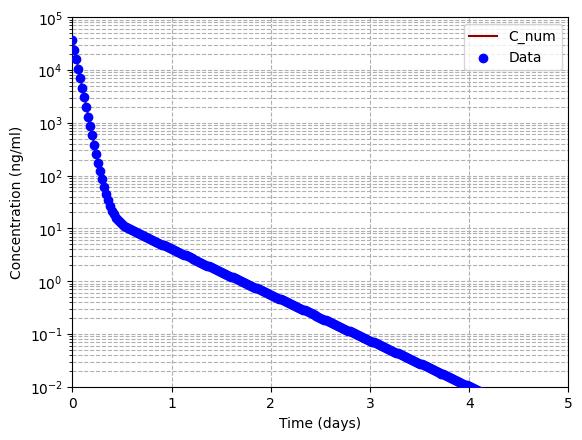

In [ ]:
k10 = 0.868*24
k12 = 0.006*24
k21 = 0.0838*24
V1 = 810

#Defining the model
def Pharma(
    t,
    k12  = 0.006*24,
    k21  = 0.0838*24,
    k10  =  0.868*24,
):
    def func(y, t):

        return [
            -k12 * y[0] + k21 * y[1] - k10 * y[0],
             k12 * y[0] - k21 * y[1],
        ]

    # defining initial conditions for 6 state variables
    y0 = [3e+7, 0]
    # y0 = [1,0]
    return odeint(func, y0, t)



t_dense = jnp.linspace(0, 5, 501)
y_dense = Pharma(np.ravel(t_dense))
sample_rate = 2
t_data = t_dense[::sample_rate]
data = y_dense[::sample_rate,0]/V1

# Plotting
# plt.figure(figsize=(10, 5))
plt.plot(t_dense, y_dense[:,0]/V1, color='darkred', label='C_num')
plt.scatter(t_data , data, color='blue', label='Data', zorder=5)  # scatter plot for experimental data
plt.xlabel("Time (days)")
plt.ylabel("Concentration (ng/ml)")
plt.yscale('log')
plt.ylim(10, 100000)
plt.xlim(0, 5)
plt.ylim(0.01, 100000 )
plt.grid(True,which="both", ls="--")
plt.legend()
plt.grid(True,which="both", ls="--")
plt.xscale('linear')
plt.show()


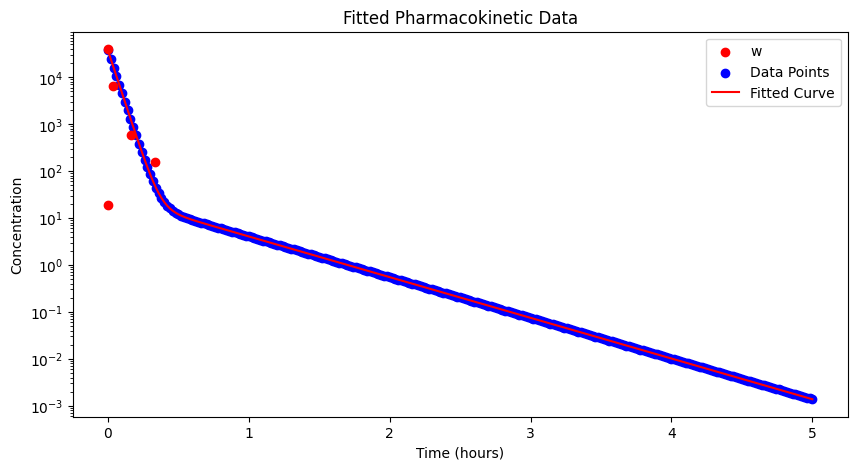

 A = 29975901.2365282 , B = 24098.7619594 ,kA = 20.9912588 ,kB = 1.9959407
29975901.24$e^20.99t$ +24098.76$e^2.00t$


In [ ]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
  # Using the concentration from the first compartment
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
k10 = 0.868*24
k12 = 0.006*24
k21 = 0.0838*24
V1 = 810
# Define the pharmacokinetic model function
def Pharma(t, k12=0.006*24, k21=0.0838*24, k10=0.868*24):
    def func(y, t):
        return [
            -k12 * y[0] + k21 * y[1] - k10 * y[0],  # Rate of change of y1
            k12 * y[0] - k21 * y[1]                # Rate of change of y2
        ]

    # Initial conditions
    y0 = [3e+7, 0]  # Starting with all drug in compartment 1, none in compartment 2
    return odeint(func, y0, t)

# Time points and data generation
t_dense = np.linspace(0, 5, 501)
y_dense = Pharma(t_dense)

# Sample data for curve fitting
sample_rate = 2
t_data = t_dense[::sample_rate]
data = y_dense[::sample_rate, 0]  # Using the concentration from the first compartment



# Redefine the curve-fitting function to fit the model
def first_order_kinetics2(t, A, B, kA, kB):
    return A * np.exp(-kA * t) + B * np.exp(-kB * t)

# Initial guess for the parameters [A, B, kA, kB]
# initial_guess = [3e+7, 0.1, 0.1, 0.1]  # A rough guess considering the initial condition and decay

# Perform the curve fitting for the model and data
params, covariance = curve_fit(first_order_kinetics2, t_data, data)
A, B, kA, kB = params

# Generate fitted curves using the optimized parameters
time_fit = np.linspace(0, 5, 501)
conc_fit = first_order_kinetics2(time_fit, A, B, kA, kB)/V1

# Plotting the results
plt.figure(figsize=(10, 5))
t_m = np.array([21.999, 22.000, 22.037, 22.162, 22.333])
w = np.array([19.198, 39396.228, 6619.183, 579.324, 154.226])
# Cb_num = np.array(A1) / V1
# t = np.linspace(0, num*dt, num+1)

# Plotting
# plt.figure(figsize=(10, 5))
# plt.plot(t, Cb_num, color='darkred', label='C_num')
plt.scatter(t_m-22, w, color='red', label='w', zorder=5)  # scatter plot for experimental data

plt.scatter(t_data, data/V1, color='blue', label='Data Points')
plt.plot(time_fit, conc_fit, color='red', label='Fitted Curve')
plt.title('Fitted Pharmacokinetic Data')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.legend()
plt.yscale('log')
plt.show()

# Output the fitted parameters
A, B, kA, kB
print(f' A = {A:.7f} , B = {B:.7f} ,kA = {kA:.7f} ,kB = {kB:.7f}')
print(f'{A:.2f}$e^{kA:.2f}t$ +{B:.2f}$e^{kB:.2f}t$')

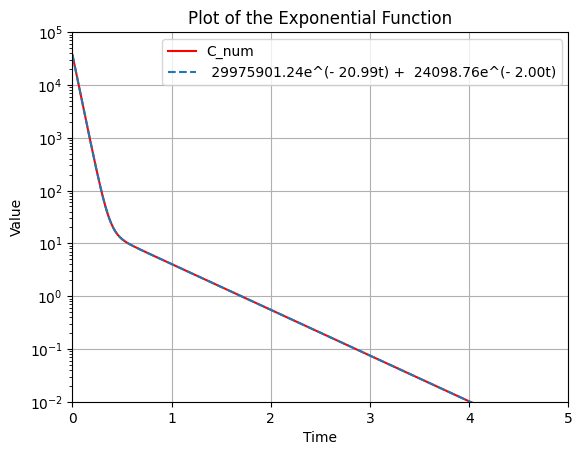

In [ ]:

t = np.linspace(0, 5, 501)
Q = first_order_kinetics2(t, A, B, kA, kB)

Qb=A * np.exp(-kA * t) + B * np.exp(-kB * t)


# Plotting the exponential function
# plt.figure(figsize=(10, 5))
plt.plot(t_dense, y_dense[:,0]/V1, color='red', label='C_num')
# plt.plot(t, Qb/V1, label= f'{A: .2f}e^(-{kA : .2f}t) + {B : .2f}e^(-{kB : .2f}t)')
plt.plot(t, Qb/V1,'--', label= f'{A: .2f}e^(-{kA : .2f}t) + {B : .2f}e^(-{kB : .2f}t)')

plt.title('Plot of the Exponential Function')
plt.xlabel('Time')
plt.ylabel('Value')
# plt.ylim(10, 100000)
plt.legend()
plt.yscale('log')
plt.ylim(0.01, 100000)
plt.xlim(0,5)
plt.grid(True)
plt.show()


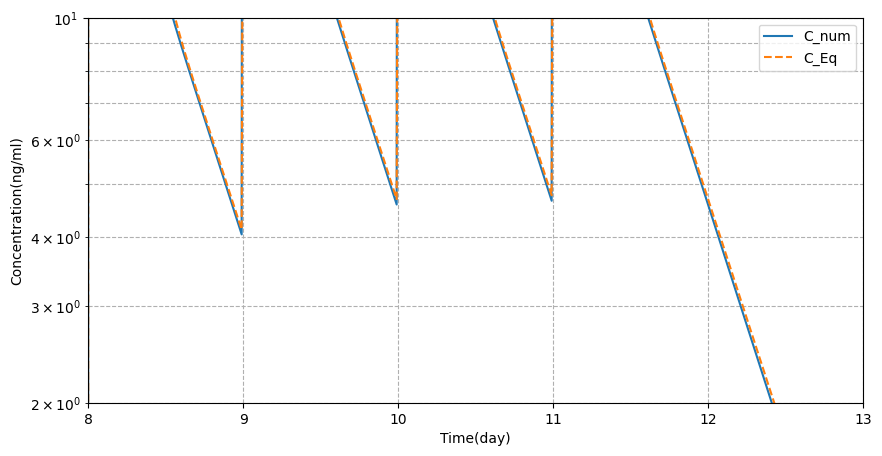

In [ ]:
k10 = 0.868*24
k12 = 0.006*24
k21 = 0.0838*24

V1 = 810


num = 3500
dt = 0.01
A1 = []
A2 = []
A_10 = 0
A1.append(A_10)
A2.append(0)
# t_dose=np.arange(8,17,4)
t_dose=np.arange(8,12,1)

for i in range(1, num+1):

    product = i * dt
    # if product.is_integer() and int(product) in [13,17,21]:
    if product.is_integer() and int(product) in t_dose:
      mu = 3e+7
    else:
        mu = 0


    A1i = A1[i-1] - dt*(k10 + k12)*A1[i-1] + dt*k21*A2[i-1] + mu
    A2i = A2[i-1] + dt*k12*A1[i-1] - dt*k21*A2[i-1]
    A1.append(A1i)
    A2.append(A2i)



Cb_num = np.array(A1)
t = np.linspace(0, 35, 3501)


# A = 30075901.2365281 #, B = 24098.7619595 ,kA = 20.9912588 ,kB = 1.9959407
Qm = np.sum([
    A * np.exp(-kA * (t - t_d))*np.heaviside(t - t_d, 0.001) + B * np.exp(-kB * (t - t_d))*np.heaviside(t - t_d, 0.001)
    for t_d in t_dose
], axis=0)


# Qm = np.sum([
#     A * np.exp(-kA * (t - t_d))+ B * np.exp(-kB * (t - t_d))
#     for t_d in t_dose
# ], axis=0)
plt.figure(figsize=(10, 5))
plt.plot(t, Cb_num/V1, label='C_num')
plt.plot(t, Qm/V1, '--', label='C_Eq')


plt.xlabel("Time(day)")
plt.ylabel("Concentration(ng/ml)")
plt.yscale('log')
plt.ylim(2, 10 )
# plt.xlim(7, 13 )
# plt.ylim(10, 100000)
plt.xlim(8, 13)
plt.grid()
plt.legend()
plt.grid(True,which="both", ls="--")
plt.xscale('linear')


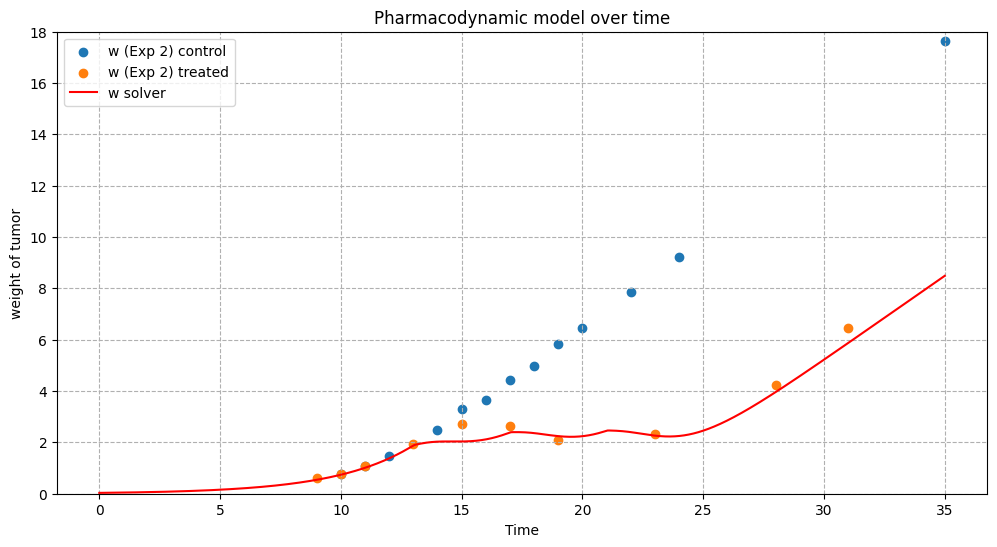

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Expriment 1 , day 8-12-16
psi = 20
k1 = 0.968 #==> True
k2 = 6.29e-4 #==> True
lambda_0_exp1 =0.311#0.273 #0.311#*24 #==> True
lambda_1_exp1 = 0.656#0.814#0.656#*24 #==> True
w0_exp1 = 0.033
V1 = 810

# # #Expriment 2 , day 13 - 17 - 21
# psi = 20
# k1 = 0.968#==> True
# k2 = 6.29e-4 #==> True
# lambda_0_exp1 =0.273 #0.311#*24 #==> True
# lambda_1_exp1 = 0.814#0.656#*24 #==> True
# w0_exp1 = 0.055 #==> not true 0.055


# k1 = -0.11691257
# k2= 8.554584e-06
# psi = 20
# lambda_0: 0.189289
# lambda_1: 0.929160


# Defining the model
def pd(t, w0=w0_exp1, lambda_0=lambda_0_exp1, lambda_1=lambda_1_exp1, k1=k1, k2=k2):
    def func(y, t):
        # t_dense = jnp.linspace(0, 35, 3501)
        # c_values = Cb_num
        # c = jnp.interp(t, t_dense, c_values)/V1
        # c = 0
        ##########################
        # t = np.linspace(0, 35, 3501)
        # # t_dose=np.arange(8,17,4)
        t_dose=np.arange(13,22,4)

        A = 29975901.2365281
        B = 24098.7619595
        kA = 20.9912588
        kB = 1.9959407

        Qm = np.sum([
            A * np.exp(-kA * (t - t_d))*np.heaviside(t - t_d, 0.001) + B * np.exp(-kB * (t - t_d))*np.heaviside(t - t_d, 0.001)
            for t_d in t_dose
        ], axis=0)
        c = Qm/V1
        # c = 0
        #########################
        x1, x2, x3, x4 = y
        w = x1 + x2 + x3 + x4


        dx1_dt = lambda_0 * x1 * (1 + (lambda_0 / lambda_1 * w)**(psi))** (-1/psi) - k2 *c* x1
        dx2_dt = k2 *c* x1 - k1 * x2
        dx3_dt = k1 * (x2 - x3)
        dx4_dt = k1 * (x3 - x4)
        # dx5_dt = k1 * (x4 - x5)
        return [dx1_dt, dx2_dt, dx3_dt, dx4_dt]

    # Initial conditions
    y0 = [w0, 0, 0, 0]

    return odeint(func, y0, t)

t_label = np.array([9, 10, 11, 13, 15, 17, 19, 23, 28, 31])
w_real = np.array([0.6, 0.76, 1.08, 1.92, 2.72, 2.64, 2.08, 2.32, 4.24, 6.44])
# Time points
t_dense = np.linspace(0, 35, 3501)  # Assuming 10 time units, change as necessary

# Run model for experiment 1
y_dense = pd(t_dense)
# Plotting
w = y_dense[:, 0] + y_dense[:, 1]+ y_dense[:, 2]+ y_dense[:, 3]#+ y_dense[:, 4]
# w = y_dense[:, 0] + y_dense[:, 1]#+ y_dense[:, 4]
# w = y_dense[:, 0] + y_dense[:, 1]
plt.figure(figsize=(12, 6))
y_dense = pd(t_dense)
t_label = np.array([9, 10, 11, 13, 15, 17, 19, 23, 28, 31])
w_real = np.array([0.6, 0.76, 1.08, 1.92, 2.72, 2.64, 2.08, 2.32, 4.24, 6.44])
import numpy as np

# Data provided by the user
# t_control = np.array([
#     13.023018895957400, 15.035884084984500, 16.988120804462600, 19.013111687399500,
#     22.97821359590480, 28.034627956292100, 31.053925739832800
# ])
# w_control = np.array([
#     1.958486803895350, 3.7550873549711600, 4.649212927320120, 6.359594020557290,
#     9.933954104029070, 13.578192829261000, 17.114530201115700
# ])

t_control = np.array([10, 11, 12, 14, 15, 16, 17, 18, 19 , 20, 22, 24, 35])
w_control = np.array([0.75, 1.07, 1.47, 2.49, 3.3, 3.67, 4.44, 4.96, 5.85, 6.47, 7.84, 9.24, 17.65])


t_label1 = [9.033519553, 9.972067039, 10.98882682, 12.00558659, 13.02234637, 14, 15.01675978, 16.03351955, 17.01117318, 18.02793296, 19.00558659, 20.02234637, 22.05586592, 24.05027933, 27.06145251]
w_real1 = [0.352941176, 0.509803922, 0.431372549, 0.470588235, 0.392156863, 0.431372549, 0.549019608, 0.62745098, 0.745098039, 0.823529412, 0.941176471, 1.098039216, 1.490196078, 2.274509804, 3.294117647]
# w_real = np.array([0.6, 0.76, 1.08, 1.92, 2.72, 2.67, 2.15, 2.34, 4.22, 6.4])
# Plotting
# plt.figure(figsize=(12, 6))
# plt.scatter(t_label1, w_real1, label='w (Exp 1) measured')
plt.scatter(t_control, w_control, label='w (Exp 2) control')
plt.scatter(t_label, w_real, label='w (Exp 2) treated')
# w = y_dense[:, 0] + y_dense[:, 1]+ y_dense[:, 2]+ y_dense[:, 3]
plt.plot(t_dense, w, '-',color='red', label='w solver')
# plt.plot(t_dense, y_dense[:, 0], '--b', label='x1 solver')
# plt.plot(t_dense, y_dense[:, 1], '--r', label='x2 solver')
# plt.plot(t_dense, y_dense[:, 2], '--', label='x3 solver')
plt.ylim(0, 18)
plt.title('Pharmacodynamic model over time')
plt.xlabel('Time')
plt.ylabel('weight of tumor')
plt.legend()
plt.grid(True,which="both", ls="--")
plt.xscale('linear')
# plt.grid(which="both")
plt.show()




In [ ]:
t_i  = jnp.array([[0]])
IC = np.array([w0_exp1,0,0, 0])
IC = np.array(IC).astype(np.float32)
IC

array([0.033, 0.   , 0.   , 0.   ], dtype=float32)

#**Numerical solver for parameter estimation _ tumor growth**

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

# Data
t_control = np.array([
    13.023018895957400, 15.035884084984500, 16.988120804462600, 19.013111687399500,
    22.97821359590480, 28.034627956292100, 31.053925739832800
])
w_control = np.array([
    1.958486803895350, 3.7550873549711600, 4.649212927320120, 6.359594020557290,
    9.933954104029070, 13.578192829261000, 17.114530201115700
])

# Model function
def model(t, lambda_0, lambda_1):
    w = np.interp(t, t_control, w_control)
    # return np.exp(lambda_0) * w * (1 + (np.exp(lambda_0) / np.exp(lambda_1) * w)**(20))** (-1/20)
    return (lambda_0) * w * (1 + ((lambda_0) / (lambda_1) * w)**(20))** (-1/20)

# Initial parameter guesses
initial_guess = [0.27, 0.8]

# Fit the model
params, params_covariance = curve_fit(model, t_control, w_control, initial_guess)

# Print the results
print("Estimated parameters:")
# print("lambda_0 =", np.exp(params[0]))
print("lambda_0 =", params[0])
# print("lambda_1 =", np.exp(params[1]))
print("lambda_1 =", params[1])
# print("psi =", params[2])




Estimated parameters:
lambda_0 = 1.0000000001584268
lambda_1 = 43.7469756762735


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


#**PINNs for tumor growth**

#**PINNs**

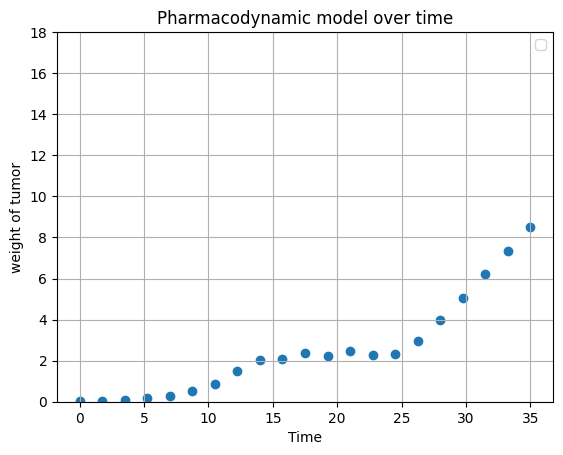

In [ ]:
t_dense = np.linspace(0, 35, 3501) # Assuming 10 time units, change as necessary
# Run model for experiment 1
y_dense = pd(t_dense)
sample_rate = 175
t_data = t_dense[::sample_rate]
data = y_dense[::sample_rate]
w = data[:, 0] + data[:, 1]+ data[:, 2]+ data[:, 3]
data= w
# Ii_data = y_dense[::sample_rate,1:2]
# G_data = y_dense[::sample_rate,2:3]
# h1_data = y_dense[::sample_rate,3:4]


# t_data = np.array([9.033519553, 9.972067039, 10.98882682, 12.00558659, 13.02234637, 14, 15.01675978, 16.03351955, 17.01117318, 18.02793296, 19.00558659, 20.02234637, 22.05586592, 24.05027933, 27.06145251])
# data = np.array([0.352941176, 0.509803922, 0.431372549, 0.470588235, 0.392156863, 0.431372549, 0.549019608, 0.62745098, 0.745098039, 0.823529412, 0.941176471, 1.098039216, 1.490196078, 2.274509804, 3.294117647])



# data = jnp.concatenate([Ip_data, Ii_data, G_data, h1_data, h2_data, h3_data], axis=1)
# plt.plot(t_dense, w, '-',color='red', label='w solver')
# plt.scatter(t_label1, w_real1, label='w (Exp 1) measured')
# plt.scatter(t_label, w_real,marker='o',color='red',)
plt.scatter(t_data, data)
# plt.scatter(t_label, w_real, label='w (Exp 2) treated')

# plt.plot(t_dense, y_dense[:, 0], '--b', label='x1 (Exp 1)')
plt.ylim(0, 18)
plt.title('Pharmacodynamic model over time')
plt.xlabel('Time')
plt.ylabel('weight of tumor')
plt.legend()
plt.grid()
plt.show()


In [ ]:
############################################
# tmin,tmax=0.

t_dense = np.linspace(0, 35, 3501)[:, None]
tmin, tmax = t_dense[0,0], t_dense[-1,0]



# #t = (t-np.min(t))/(np.max(t)-np.min(t))
# def init_params(layers, seed):
#     keys = jax.random.split(jax.random.PRNGKey(seed), len(layers) - 1)
#     params = []
#     for key, n_in, n_out in zip(keys, layers[:-1], layers[1:]):
#         W = jax.random.normal(key, shape=(n_in, n_out)) / jnp.sqrt(n_in) # random initialization
#         B = jax.random.normal(key, shape=(n_out,))
#         params.append({'W': W, 'B': B, 'k1' : 0.1 , 'k2' : 0.1})
#         # params.append({'W': W, 'B': B })
#     return params

import jax
import jax.numpy as jnp

def xavier_init(size, seed=None):
    key = jax.random.PRNGKey(seed) if seed is not None else jax.random.PRNGKey(0)
    in_dim, out_dim = size
    xavier_stddev = jnp.sqrt(2 / (in_dim + out_dim))
    return jax.random.truncated_normal(key, shape=(in_dim, out_dim), dtype=jnp.float32, stddev=xavier_stddev)


# def init_params(layers, seed):
#     keys = jax.random.split(jax.random.PRNGKey(seed), len(layers) - 1)
#     params = []
#     for key, n_in, n_out in zip(keys, layers[:-1], layers[1:]):
#         W = jax.random.normal(key, shape=(n_in, n_out)) / jnp.sqrt(n_in) # random initialization
#         B = jax.random.normal(key, shape=(n_out,))
#         params.append({'W': W, 'B': B, 'k1' : 0.1 , 'k2' : 0.1})
#         # params.append({'W': W, 'B': B })
#     return params
# import jax
# import jax.numpy as jnp

def init_params(layers, seed):
    keys = jax.random.split(jax.random.PRNGKey(seed), len(layers) - 1)
    params = []
    for key, n_in, n_out in zip(keys, layers[:-1], layers[1:]):
        # Xavier initialization for weights using normal distribution
        xavier_stddev = jnp.sqrt(2.0 / (n_in + n_out))
        W = jax.random.normal(key, shape=(n_in, n_out)) * xavier_stddev  # Scale by Xavier stddev

        # Bias initialized to zero
        B = jnp.zeros((n_out,))

        # Append parameters with additional constants k1 and k2 if needed
        params.append({'W': W, 'B': B, 'k1': 0.1, 'k2': 0.1})

    return params
def feature_transform(t):
    t = 0.01 * t
    return jnp.concatenate(
        (t, jnp.exp(t), jnp.exp(2 * t), jnp.exp(3 * t), jnp.exp(4 * t), jnp.exp(5 * t)),
        axis=1,
    )

def fwd(params,t):
  # t = 0.01 * t
  X = jnp.concatenate([t],axis=0)
  # X = feature_transform(t)
  *hidden,last = params
  for layer in hidden :
    X = jax.nn.swish(X@layer['W']+layer['B'])
    # X = jnp.sin(X@layer['W']+layer['B'])
  return X@last['W'] + last['B']


# def fwd(params,t):
#   # t = 0.01 * t
#   X = jnp.concatenate([t],axis=0)
#   *hidden,last = params
#   for layer in hidden :
#     X = jax.nn.tanh(X@layer['W']+layer['B'])
#     # X = jnp.sin(X@layer['W']+layer['B'])
#   return X@last['W'] + last['B']

def fwd_extra(params,t):
  # t = 0.01 * t
  X = jnp.concatenate([t],axis=0)
  *hidden,last = params
  for layer in hidden :
    X = jax.nn.tanh(X@layer['W']+layer['B'])
  X = X@last['W'] + last['B']
  return X



@jax.jit
def MSE(true,pred):
  return jnp.mean((true-pred)**2)


In [ ]:
################################################
def ODE_loss(t, y1, y2, y3, y4,params):
    psi = 20
    # k1 = 0.968#==> True
    # k2 = 6.29e-4 #==> True
    l0 =0.273 #0.311#*24 #==> True
    l1 = 0.814#0.656#*24 #==> True
    w0_exp1 = 0.055 #==> not true 0.055

    # psi = 20
    # k1 = 0.968 #==> True
    # k2 = 6.29e-4 #==> True
    # l0 =0.311#0.273 #0.311#*24 #==> True
    # l1 = 0.656#0.814#0.656#*24 #==> True
    # w0_exp1 = 0.033

    # # # k1 = get_variable(1, params[0]['k12'])
    k1 = params[0]['k1']
    k2 = params[0]['k2'] *1e-5
    # l0 = params[0]['l1']
    # l1 = params[0]['l2']

    t_dense = jnp.linspace(0, 35, 3501)
    c_values = Cb_num
    c = jnp.interp(t, t_dense, c_values)/V1

    y1_t = lambda t: jax.grad(lambda t: jnp.sum(y1(t)))(t)
    y2_t = lambda t: jax.grad(lambda t: jnp.sum(y2(t)))(t)
    y3_t = lambda t: jax.grad(lambda t: jnp.sum(y3(t)))(t)
    y4_t = lambda t: jax.grad(lambda t: jnp.sum(y4(t)))(t)


    x1, x2, x3, x4 = y1(t), y2(t),y3(t),y4(t)
    w = x1+x2+x3+x4



    ode1 = y1_t(t) - (l0 * x1 * (1 + (l0 / l1 * w)**(psi))** (-1/psi) - k2 *c* x1)
    ode2 = y2_t(t) - (k2 *c* x1 - k1 * x2)
    ode3 = y3_t(t) - (k1 * (x2 - x3))
    ode4 = y4_t(t) - (k1 * (x3 - x4))

    return ode1, ode2, ode3, ode4




#collocation points
N_c = 351

t_c = jnp.linspace(tmin, tmax, N_c+1)[:, None]

# def loss_fun(params,params_extra, l1 ,l2 , t_i, t_d, t_c, data_IC, data):
def loss_fun(params, t_i, t_d, t_c, data_IC, data):

    # l3, l4 = 1, 1
    y1_func = lambda t: fwd(params, t)[:, [0]]
    y2_func = lambda t: fwd(params, t)[:, [1]]
    y3_func = lambda t: fwd(params, t)[:, [2]]
    y4_func = lambda t: fwd(params, t)[:, [3]]
    # ft      = lambda t: fwd(params, t)[:, [2]]
    # ft     = lambda t: fwd_extra(params_extra, t)[:, [0]]



    # loss_y1, loss_y2, loss_y3 = ODE_loss(t_c, params, y1_func, y2_func, y3_func, f_t)
    loss_y1, loss_y2, loss_y3, loss_y4 = ODE_loss(t_c, y1_func, y2_func, y3_func, y4_func,params)

    # loss_y1 = l1*loss_y1
    # loss_y2 = l2*loss_y2
    # loss_y3 = l3*loss_y3
    # loss_y4 = l4*loss_y4

    loss_y1 = loss_y1
    loss_y2 = loss_y2
    loss_y3 = loss_y3
    loss_y4 = loss_y4

    loss_ode1 = jnp.mean(loss_y1 ** 2)
    loss_ode2 = jnp.mean(loss_y2 ** 2)
    loss_ode3 = jnp.mean(loss_y3 ** 2)
    loss_ode4 = jnp.mean(loss_y4 ** 2)

    # Compute the loss for the initial conditions
    t_i = t_i.flatten()[:,None]
    pred_IC = jnp.concatenate([y1_func(t_i), y2_func(t_i), y3_func(t_i), y4_func(t_i)],axis=1)
    loss_IC = MSE(data_IC, pred_IC)

    # Compute the loss for Y_data
    # t_d    = t_d.flatten()[:,None]
    # w = y1_func(t_d) + y2_func(t_d) + y3_func(t_d) + y4_func(t_d)
    # # pred_d = jnp.concatenate([y1_func(t_d), y2_func(t_d)],axis=1)
    # loss_data = MSE(data, w)
    t_d    = t_d.flatten()[:,None]
    w = y1_func(t_d) + y2_func(t_d) + y3_func(t_d) + y4_func(t_d)
    data = data.reshape(-1, 1)
    # pred_d = jnp.concatenate([y1_func(t_d), y2_func(t_d)],axis=1)
    loss_data = MSE(data, w)
    # loss_data = 0



    return loss_IC, loss_data, loss_ode1, loss_ode2, loss_ode3, loss_ode4





# def loss_fun_total(params, params_extra, l1,l2, t_i, t_d, t_c, data_IC, data, loss_weight):

#     loss_IC, loss_data, loss_ode1, loss_ode2, loss_ode3, loss_ode4 = loss_fun(params, params_extra, l1,l2, t_i, t_d, t_c, data_IC, data)

#     loss_total = loss_weight[0]*loss_IC+ loss_weight[1]*loss_data\
#                 + loss_weight[2]*loss_ode1+ loss_weight[3]*loss_ode2+ loss_weight[4]*loss_ode3+ loss_weight[5]*loss_ode4

#     return loss_total


def loss_fun_total(params, t_i, t_d, t_c, data_IC, data, loss_weight):

    loss_IC, loss_data, loss_ode1, loss_ode2, loss_ode3, loss_ode4 = loss_fun(params, t_i, t_d, t_c, data_IC, data)

    loss_total = loss_weight[0]*loss_IC+ loss_weight[1]*loss_data\
                + loss_weight[2]*loss_ode1+ loss_weight[3]*loss_ode2+ loss_weight[4]*loss_ode3+ loss_weight[5]*loss_ode4

    return loss_total


@jax.jit
def update(opt_state, params, t_i, t_data, t_c, IC, data, loss_weight):
  grads=jax.grad(loss_fun_total, argnums=[0])(params, t_i, t_data, t_c, IC, data, loss_weight)

  #Update params
  updates, opt_state = optimizer.update(grads[0], opt_state)
  params = optax.apply_updates(params, updates)

  return opt_state, params



# @jax.jit
# def update(opt_state, opt_state_extra, params, params_extra, params_l1, params_l2, opt_state_l1, opt_state_l2, t_i, t_data, t_c, IC, data, loss_weight):
#   grads=jax.grad(loss_fun_total, argnums=[0,1,2,3])(params,params_extra, params_l1, params_l2, t_i, t_data, t_c, IC, data, loss_weight)

#   #Update params
#   updates, opt_state = optimizer.update(grads[0], opt_state)
#   params = optax.apply_updates(params, updates)

#   updates_extra, opt_state_extra = optimizer_ex.update(grads[1], opt_state_extra)
#   params_extra = optax.apply_updates(params_extra, updates_extra)

#   updates_l1, opt_state_l1 = optimizer.update(-grads[2], opt_state_l1)
#   params_l1 = optax.apply_updates(params_l1, updates_l1)

#   updates_l2, opt_state_l2 = optimizer.update(-grads[3], opt_state_l2)
#   params_l2 = optax.apply_updates(params_l2, updates_l2)


#   return opt_state, opt_state_extra, params, params_extra,  params_l1, params_l2, opt_state_l1, opt_state_l2






#################################################################
num_seeds = 1

all_C1 = []
# all_C2 = []
# all_k = []
k2_values_list = []
k1_values_list = []
l1_values_list = []
l2_values_list = []

loss_his, loss_indi_his, epoch_his = [], [], []
# start_time = time.time()
epochs_phase1 = 5000#10000
epochs_phase2 = 0#20000#1000
# loss_weight_phase1 = [1, 1, 1, 1, 1, 1]
loss_weight_phase1 = [1, 1, 0, 0, 0, 0]
loss_weight_phase2 = [1, 1, 1, 1, 1, 1]

for sd in range(num_seeds):
    print(f"traning for seed number {sd} : ")
    seed = random.randint(1, 1000)
    params = init_params([1] + [50]*6+[4], seed)
    # params_extra = init_params([1] + [20]*4+[1],seed)  # Initialize parameters for the extra neural network

    optimizer = optax.adam(1e-3)
    opt_state = optimizer.init(params)
    # optimizer_ex = optax.adam(1e-3)
    # opt_state_extra = optimizer_ex.init(params_extra)


    # keys = jax.random.split(jax.random.PRNGKey(seed), 10)
    # lambda_p = jax.random.uniform(keys[0], shape=(N_c + 1, 1))
    # lambda_1 = jax.random.uniform(keys[1], shape=(N_c + 1, 1))
    # lambda_2 = jax.random.uniform(keys[2], shape=(N_c + 1, 1))
    # lambda_3 = jax.random.uniform(keys[3], shape=(N_c + 1, 1))


    # opt_state_lp = optimizer.init(lambda_p)
    # opt_state_l1 = optimizer.init(lambda_1)
    # opt_state_l2 = optimizer.init(lambda_2)
    # opt_state_l3 = optimizer.init(lambda_3)

    for ep in range(epochs_phase1 + epochs_phase2 + 1):
        if ep <= epochs_phase1:
            loss_weight = loss_weight_phase1
        else:
            loss_weight = loss_weight_phase2

        opt_state, params = update(opt_state, params, t_i, t_data, t_c, IC, data, loss_weight)

        # print loss and epoch info
        if ep %(100) ==0:
          loss_val = loss_fun_total(params, t_i, t_data, t_c, IC, data, loss_weight)
          loss_val_individual = loss_fun(params, t_i, t_data, t_c, IC, data)
          epoch_his.append(ep)
          loss_his.append(loss_val)
          loss_indi_his.append(loss_val_individual)

        if ep %(1000) ==0:
          print(f'Epoch={ep}, \t , \t loss={loss_val:.2e}, \t loss_IC={loss_val_individual[0]:.2e}, \t loss_d={loss_val_individual[1]:.2e}, \t loss_e1={loss_val_individual[2]:.2e},\t loss_e2={loss_val_individual[3]:.2e}')

          # k20_updated = get_variable(1, params[0]['k20'])
          # k1_updated = get_variable(1, params[0]['k12'])
          # k2_updated = get_variable(1, params[0]['k21'])
          # l1_updated = get_variable(1, params[0]['k10'])
          # l2_updated = get_variable(1, params[0]['k10'])
          # k1_updated = params[0]['k1']
          # k2_updated = params[0]['k2']
          # l1_updated = params[0]['l1']
          # l2_updated = params[0]['l2']

          # k20_values_list.append(k20_updated)
          # k1_values_list.append(k1_updated)
          # k2_values_list.append(k2_updated)
          # l1_values_list.append(l1_updated)
          # l2_values_list.append(l2_updated)
          # print(f'k1= {k1_values_list[-1]} , \t k2: {k2_values_list[-1]}, \t l0: {l1_values_list[-1]}, \t l1: {l2_values_list[-1]}')
          # np.savez(f'/content/drive/MyDrive/params_extra_100_{ep}.npz', *params_extra)
          # results = np.column_stack((epoch_his, k1_values_list, k2_values_list, l1_values_list, l2_values_list))

          # Create a DataFrame from the combined results array
          # df = pd.DataFrame(results, columns=['Epoch', 'k1', 'k2', 'l1', 'l2'])

          # Save the DataFrame to a CSV file
          # df.to_csv('./4copmt_params.csv', index=False)

    np.savez(f'./params_{sd}.npz', *params)



traning for seed number 0 : 
Epoch=0, 	 , 	 loss=9.77e+00, 	 loss_IC=2.07e-04, 	 loss_d=9.77e+00, 	 loss_e1=4.02e-03,	 loss_e2=1.14e-03
Epoch=1000, 	 , 	 loss=3.38e-03, 	 loss_IC=2.46e-06, 	 loss_d=3.37e-03, 	 loss_e1=1.52e-02,	 loss_e2=3.94e-02
Epoch=2000, 	 , 	 loss=2.32e-03, 	 loss_IC=3.55e-10, 	 loss_d=2.32e-03, 	 loss_e1=1.84e-02,	 loss_e2=4.08e-02
Epoch=3000, 	 , 	 loss=2.27e-03, 	 loss_IC=4.29e-10, 	 loss_d=2.27e-03, 	 loss_e1=1.98e-02,	 loss_e2=3.20e-02
Epoch=4000, 	 , 	 loss=2.09e-03, 	 loss_IC=2.91e-09, 	 loss_d=2.09e-03, 	 loss_e1=2.43e-02,	 loss_e2=3.39e-02
Epoch=5000, 	 , 	 loss=2.18e-05, 	 loss_IC=1.88e-10, 	 loss_d=2.18e-05, 	 loss_e1=3.92e-02,	 loss_e2=5.17e-02


In [ ]:
t_dense = np.linspace(0, 35, 3501)[:, None]
pred = fwd(params,t_dense)
C = pred[:,0]+pred[:,1]+pred[:,2]+pred[:,3]

k1 = params[0]['k1']
k2 = params[0]['k2'] *1e-5
k1, k2

(Array(0.1, dtype=float32), Array(1.e-06, dtype=float32))

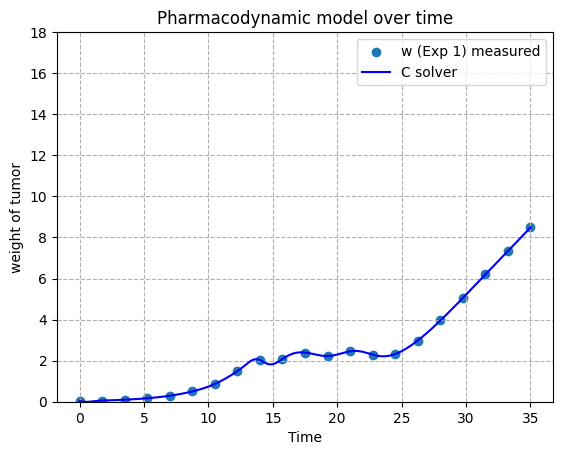

In [ ]:
# t_label1 = [9.033519553, 9.972067039, 10.98882682, 12.00558659, 13.02234637, 14, 15.01675978, 16.03351955, 17.01117318, 18.02793296, 19.00558659, 20.02234637, 22.05586592, 24.05027933, 27.06145251]
# w_real1 = [0.352941176, 0.509803922, 0.431372549, 0.470588235, 0.392156863, 0.431372549, 0.549019608, 0.62745098, 0.745098039, 0.823529412, 0.941176471, 1.098039216, 1.490196078, 2.274509804, 3.294117647]
plt.scatter(t_data, data, label='w (Exp 1) measured')
# plt.scatter(t_label, w_real, label='w (Exp 2) measured')

# w = y_dense[:, 0] + y_dense[:, 1]+ y_dense[:, 2]+ y_dense[:, 3]
# plt.plot(t_dense, w, '-',color='red', label='w solver')
plt.plot(t_dense, C, '-',color='blue', label='C solver')
# plt.plot(t_dense, y_dense[:, 0], '--b', label='x1 solver')
# plt.plot(t_dense, y_dense[:, 1], '--r', label='x2 solver')
# plt.plot(t_dense, y_dense[:, 2], '--', label='x3 solver')
plt.ylim(0, 18)
plt.title('Pharmacodynamic model over time')
plt.xlabel('Time')
plt.ylabel('weight of tumor')
plt.legend()
plt.grid(True,which="both", ls="--")
plt.xscale('linear')
# plt.grid(which="both")
plt.show()


In [ ]:

plt.figure()
# plt.scatter(t_data, data, marker='s', label='$w measured')
# plt.scatter(t_data, Q2_measured, marker='s', label='$m_2$ measured')

plt.plot(t_dense, overall_mu_C1, label="mean of c1")
# plt.plot(t1, c1, ".r", label="c1 observations")
plt.fill_between(
    t_dense.reshape([-1]),
    (overall_mu_C1 + 2 * overall_std_C1).reshape([-1]),
    (overall_mu_C1 - 2 * overall_std_C1).reshape([-1]),
    alpha=0.3,
)

# plt.plot(t_dense, overall_mu_C2, label="mean of c2")
# # plt.plot(t2, c2, ".r", label="c2 observations")
# plt.fill_between(
#     t_dense.reshape([-1]),
#     (overall_mu_C2 + 2 * overall_std_C2).reshape([-1]),
#     (overall_mu_C2 - 2 * overall_std_C2).reshape([-1]),
#     alpha=0.3,
# )

plt.ylim(0, 18)
plt.title('Pharmacodynamic model over time')
plt.xlabel('Time')
plt.ylabel('weight of tumor')
plt.legend()
plt.grid()
plt.savefig('./pred.png', dpi=300)
plt.show()

NameError: name 'overall_mu_C1' is not defined

<Figure size 640x480 with 0 Axes>